# World's Best Retired Cricketers(ODI)

## Libraries Used

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from IPython.display import Image

## Importing Dataset for analysis

In [2]:
batting = pd.read_csv('Batting.csv')
bowler = pd.read_csv('Bowling.csv')
fielder = pd.read_csv('Fielding.csv')
allrounder=pd.read_csv('All Round.csv')

In [3]:
batting.head()

,Player,Career Span,Career Start,Career End,Matches Played,Innings Batted,Not Outs,Runs Scored,Highest Innings Score,Highest Innings Score Num,...,Balls Faced,Batting Strike Rate,Hundreds Scored,Scores Of Fifty Or More,Ducks Scored,Country,Player Count,5000+ Runs Scored,40+ Batting Avg,90+ Batting Strike Rate
0,IR Bell (2004-2015),2004-2015,2004,2015,161,157,14,5416,141,141,...,7019,77.16,4,35,6,England,1,1,0,0
1,EJG Morgan (2009-2018),2009-2018,2009,2018,179,166,23,5376,124*,124,...,5901,91.10,10,31,10,England,1,1,0,1
2,PD Collingwood (2001-2011),2001-2011,2001,2011,197,181,37,5092,120*,120,...,6614,76.98,5,26,7,England,1,1,0,0
3,AJ Stewart (1989-2003),1989-2003,1989,2003,170,162,14,4677,116,116,...,6841,68.36,4,28,13,England,1,0,0,0
4,JE Root (2013-2018),2013-2018,2013,2018,109,103,14,4530,133*,133,...,5218,86.81,11,28,4,England,1,0,1,0


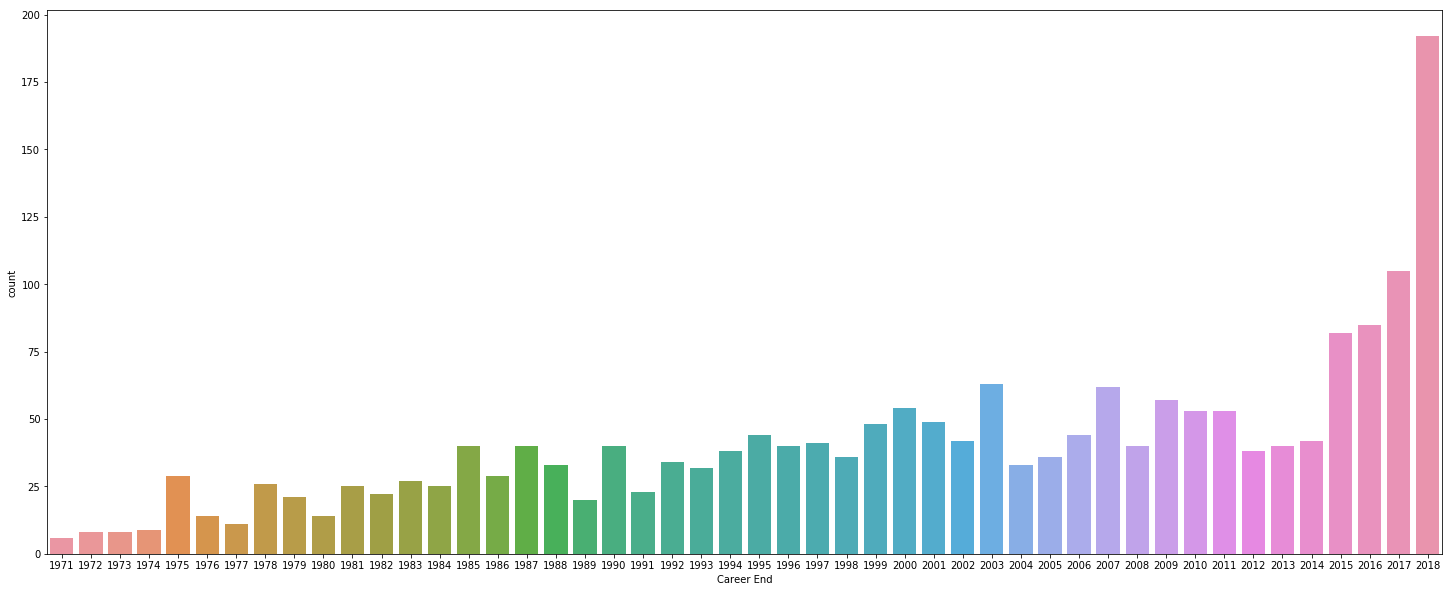

In [4]:
plt.figure(figsize=(25,10))
sns.countplot(x = batting['Career End'])

<b>According to this dataset,</b>
<br>Most of the cricketers ,having their career ends marked in 2018, have not taken the retirement untill now so we have removed all the cricketers with career end 2018.

## ================= Preparing data for analysis ================

### <u>Exploring data

#### Batting Dataset

In [5]:
batting.head()

,Player,Career Span,Career Start,Career End,Matches Played,Innings Batted,Not Outs,Runs Scored,Highest Innings Score,Highest Innings Score Num,...,Balls Faced,Batting Strike Rate,Hundreds Scored,Scores Of Fifty Or More,Ducks Scored,Country,Player Count,5000+ Runs Scored,40+ Batting Avg,90+ Batting Strike Rate
0,IR Bell (2004-2015),2004-2015,2004,2015,161,157,14,5416,141,141,...,7019,77.16,4,35,6,England,1,1,0,0
1,EJG Morgan (2009-2018),2009-2018,2009,2018,179,166,23,5376,124*,124,...,5901,91.10,10,31,10,England,1,1,0,1
2,PD Collingwood (2001-2011),2001-2011,2001,2011,197,181,37,5092,120*,120,...,6614,76.98,5,26,7,England,1,1,0,0
3,AJ Stewart (1989-2003),1989-2003,1989,2003,170,162,14,4677,116,116,...,6841,68.36,4,28,13,England,1,0,0,0
4,JE Root (2013-2018),2013-2018,2013,2018,109,103,14,4530,133*,133,...,5218,86.81,11,28,4,England,1,0,1,0


In [6]:
batting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1953 entries, 0 to 1952
Data columns (total 21 columns):
Player                       1953 non-null object
Career Span                  1953 non-null object
Career Start                 1953 non-null int64
Career End                   1953 non-null int64
Matches Played               1953 non-null int64
Innings Batted               1953 non-null object
Not Outs                     1953 non-null object
Runs Scored                  1953 non-null object
Highest Innings Score        1953 non-null object
Highest Innings Score Num    1953 non-null object
Batting Avg                  1953 non-null object
Balls Faced                  1953 non-null object
Batting Strike Rate          1953 non-null object
Hundreds Scored              1953 non-null object
Scores Of Fifty Or More      1953 non-null object
Ducks Scored                 1953 non-null object
Country                      1953 non-null object
Player Count                 1953 non-null int

In [7]:
# Removing the batters with career ends in 2018
batting = batting[(batting['Career End'] < 2018)]

#### Bowling Dataset

In [8]:
bowler.head()

,Player,Innings Bowled In,Balls Bowled,Runs Conceded,Wickets Taken,Best Bowling In An Innings,Bowling Avg,Economy Rate,Bowling Strike Rate,Four Wickets In An Innings,Five Wickets In An Innings,200+ Wickets Taken,<35.00 Bowling Avg,<4.00 Economy Rate,<40.00 Bowling Strike Rate
0,JM Anderson (2002-2015),191,9584,7861,269,5/23,29.22,4.92,35.6,11,2,1,1,0,1
1,D Gough (1994-2006),155,8422,6154,234,5/44,26.29,4.38,35.9,10,2,1,1,0,1
2,SCJ Broad (2006-2016),121,6109,5364,178,5/23,30.13,5.26,34.3,9,1,0,1,0,1
3,A Flintoff (1999-2009),116,5496,3968,168,5/19,23.61,4.33,32.7,6,2,0,1,0,1
4,IT Botham (1976-1992),115,6271,4139,145,4/31,28.54,3.96,43.2,3,0,0,1,1,0


In [9]:
bowler.tail()

,Player,Innings Bowled In,Balls Bowled,Runs Conceded,Wickets Taken,Best Bowling In An Innings,Bowling Avg,Economy Rate,Bowling Strike Rate,Four Wickets In An Innings,Five Wickets In An Innings,200+ Wickets Taken,<35.00 Bowling Avg,<4.00 Economy Rate,<40.00 Bowling Strike Rate
1948,Najeeb Tarakai (2017-2017),-,NaN,-,-,-,-,-,-,-,-,0,0,0,0
1949,Noor-ul-Haq (2010-2010),-,NaN,-,-,-,-,-,-,-,-,0,0,0,0
1950,Noor Ali Zadran (2009-2017),-,NaN,-,-,-,-,-,-,-,-,0,0,0,0
1951,Shabir Noori (2010-2016),-,NaN,-,-,-,-,-,-,-,-,0,0,0,0
1952,Shafiqullah (2009-2017),-,NaN,-,-,-,-,-,-,-,-,0,0,0,0


In [10]:
bowler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1953 entries, 0 to 1952
Data columns (total 15 columns):
Player                        1953 non-null object
Innings Bowled In             1953 non-null object
Balls Bowled                  1802 non-null object
Runs Conceded                 1953 non-null object
Wickets Taken                 1953 non-null object
Best Bowling In An Innings    1953 non-null object
Bowling Avg                   1953 non-null object
Economy Rate                  1953 non-null object
Bowling Strike Rate           1953 non-null object
Four Wickets In An Innings    1953 non-null object
Five Wickets In An Innings    1953 non-null object
200+ Wickets Taken            1953 non-null int64
<35.00 Bowling Avg            1953 non-null int64
<4.00 Economy Rate            1953 non-null int64
<40.00 Bowling Strike Rate    1953 non-null int64
dtypes: int64(4), object(11)
memory usage: 228.9+ KB


#### AllRounder Dataset

In [11]:
allrounder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
Player                      37 non-null object
Batting-Bowling Avg Diff    37 non-null float64
All-Round Ind               37 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 968.0+ bytes


In [12]:
allrounder.head()

,Player,Batting-Bowling Avg Diff,All-Round Ind
0,A Flintoff (1999-2009),8.35,1
1,PD Collingwood (2001-2011),-3.32,1
2,IT Botham (1976-1992),-5.32,1
3,SR Watson (2002-2015),8.74,1
4,A Symonds (1998-2009),2.49,1


#### Fielding Dataset

In [13]:
fielder.head()

,Player,Innings Fielded,Fielding Dismissals Made,Catches Taken,Stumpings Made,Catches As A Keeper,Catches As A Fielder,Max Dismissals In An Innings,Dismissals Per Innings
0,AJ Stewart (1989-2003),169,174,159,15,148,11,6 (6ct 0st),1.029
1,JC Buttler (2012-2018),108,160,141,19,141,0,6 (6ct 0st),1.481
2,PD Collingwood (2001-2011),197,108,108,0,0,108,3 (3ct 0st),0.548
3,MJ Prior (2004-2011),68,79,71,8,69,2,6 (6ct 0st),1.161
4,GO Jones (2004-2006),49,72,68,4,68,0,5 (5ct 0st),1.469


In [14]:
fielder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1953 entries, 0 to 1952
Data columns (total 9 columns):
Player                          1953 non-null object
Innings Fielded                 1953 non-null int64
Fielding Dismissals Made        1953 non-null int64
Catches Taken                   1953 non-null int64
Stumpings Made                  1953 non-null int64
Catches As A Keeper             1953 non-null int64
Catches As A Fielder            1953 non-null int64
Max Dismissals In An Innings    1953 non-null object
Dismissals Per Innings          1953 non-null float64
dtypes: float64(1), int64(6), object(2)
memory usage: 137.4+ KB


### <u>Selecting Best features

In [15]:
features_batting = ['Player',  'Innings Batted', 'Not Outs', 'Runs Scored', 'Highest Innings Score Num', 'Batting Avg',
                    'Balls Faced', 'Batting Strike Rate', 'Hundreds Scored', 'Scores Of Fifty Or More', 'Ducks Scored']

features_bowler = ['Player','Innings Bowled In','Balls Bowled','Wickets Taken','Bowling Avg',
                   'Economy Rate', 'Bowling Strike Rate','Four Wickets In An Innings']

features_allrounder=['Player','Batting-Bowling Avg Diff']

features_fielder = ['Player','Innings Fielded','Fielding Dismissals Made','Catches Taken','Catches As A Fielder',
                    'Max Dismissals In An Innings','Dismissals Per Innings']

features_keeper  = ['Player','Stumpings Made','Catches As A Keeper']

### <u>Cleaning data

* Handeling null values
    - In  general  the  best  practice  is  to  fill  the  data  with  most  frequent  values  or  with  the  mean  of  the  data  but  here  we  can't  follow  that  approach  as  we  can  not  judge  the  stats  of  a  cricketer.
    - So we need to remove that data in order to remove any kind of inconsistencies.

* Remove noise from data
* Converting the columns into proper data types

#### Batting Dataset

In [16]:
batting_new = batting[features_batting]

In [17]:
batting_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1761 entries, 0 to 1952
Data columns (total 11 columns):
Player                       1761 non-null object
Innings Batted               1761 non-null object
Not Outs                     1761 non-null object
Runs Scored                  1761 non-null object
Highest Innings Score Num    1761 non-null object
Batting Avg                  1761 non-null object
Balls Faced                  1761 non-null object
Batting Strike Rate          1761 non-null object
Hundreds Scored              1761 non-null object
Scores Of Fifty Or More      1761 non-null object
Ducks Scored                 1761 non-null object
dtypes: object(11)
memory usage: 165.1+ KB


In [18]:
batting_new['Player'] = batting_new['Player'].str.split('(')
batting_new['Player'] = batting_new['Player'].str.get(0)
batting_new.head()

C:\Users\Shantanu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Shantanu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Player,Innings Batted,Not Outs,Runs Scored,Highest Innings Score Num,Batting Avg,Balls Faced,Batting Strike Rate,Hundreds Scored,Scores Of Fifty Or More,Ducks Scored
0,IR Bell,157,14,5416,141,37.87,7019,77.16,4,35,6
2,PD Collingwood,181,37,5092,120,35.36,6614,76.98,5,26,7
3,AJ Stewart,162,14,4677,116,31.60,6841,68.36,4,28,13
5,KP Pietersen,123,16,4422,130,41.32,5100,86.70,9,25,7
6,ME Trescothick,122,6,4335,137,37.37,5087,85.21,12,21,13


In [19]:
batting_new = batting_new.replace('-',np.nan)

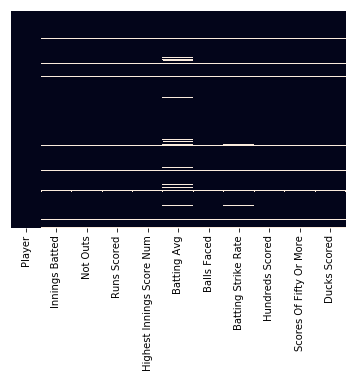

In [20]:
# Checking null values
sns.heatmap(batting_new.isnull(),yticklabels = False, cbar = False)

In [21]:
# Removing null values
batting_new = batting_new.dropna(how = 'any')

In [22]:
batting_new['Highest Innings Score Num'] = batting_new['Highest Innings Score Num'].astype('int')
batting_new['Scores Of Fifty Or More']   = batting_new['Scores Of Fifty Or More'].astype('int')
batting_new['Batting Strike Rate']       = batting_new['Batting Strike Rate'].astype('float')
batting_new['Hundreds Scored']           = batting_new['Hundreds Scored'].astype('int')
batting_new['Not Outs']                  = batting_new['Not Outs'].astype('int')
batting_new['Innings Batted']            = batting_new['Innings Batted'].astype('int')
batting_new['Runs Scored']               = batting_new['Runs Scored'].astype('int')
batting_new['Batting Avg']               = batting_new['Batting Avg'].astype('float')
batting_new['Balls Faced']               = batting_new['Balls Faced'].astype('int')
batting_new['Ducks Scored']              = batting_new['Ducks Scored'].astype('int')

In [23]:
batting_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1604 entries, 0 to 1947
Data columns (total 11 columns):
Player                       1604 non-null object
Innings Batted               1604 non-null int32
Not Outs                     1604 non-null int32
Runs Scored                  1604 non-null int32
Highest Innings Score Num    1604 non-null int32
Batting Avg                  1604 non-null float64
Balls Faced                  1604 non-null int32
Batting Strike Rate          1604 non-null float64
Hundreds Scored              1604 non-null int32
Scores Of Fifty Or More      1604 non-null int32
Ducks Scored                 1604 non-null int32
dtypes: float64(2), int32(8), object(1)
memory usage: 100.2+ KB


#### Bowling Dataset

In [24]:
bowler = bowler.replace('-',np.nan)

bowler['Player']       = bowler['Player'].str.split('(')
bowler['Career Span']  = bowler['Player'].str.get(1)
bowler['Player']       = bowler['Player'].str.get(0)

bowler['Career Span']  = bowler['Career Span'].str.split(')')
bowler['Career Span']  = bowler['Career Span'].str.get(0)

bowler['Career Begin'] = bowler['Career Span'].str.split('-')
bowler['Career End']   = bowler['Career Begin'].str.get(1)
bowler['Career Begin'] = bowler['Career Begin'].str.get(0)

bowler['Balls Bowled'] = bowler['Balls Bowled'].str.split(',')
bowler['Balls Bowled'] = bowler['Balls Bowled'].str.get(0)

bowler.head()

,Player,Innings Bowled In,Balls Bowled,Runs Conceded,Wickets Taken,Best Bowling In An Innings,Bowling Avg,Economy Rate,Bowling Strike Rate,Four Wickets In An Innings,Five Wickets In An Innings,200+ Wickets Taken,<35.00 Bowling Avg,<4.00 Economy Rate,<40.00 Bowling Strike Rate,Career Span,Career Begin,Career End
0,JM Anderson,191,9584,7861,269,5/23,29.22,4.92,35.6,11,2,1,1,0,1,2002-2015,2002,2015
1,D Gough,155,8422,6154,234,5/44,26.29,4.38,35.9,10,2,1,1,0,1,1994-2006,1994,2006
2,SCJ Broad,121,6109,5364,178,5/23,30.13,5.26,34.3,9,1,0,1,0,1,2006-2016,2006,2016
3,A Flintoff,116,5496,3968,168,5/19,23.61,4.33,32.7,6,2,0,1,0,1,1999-2009,1999,2009
4,IT Botham,115,6271,4139,145,4/31,28.54,3.96,43.2,3,0,0,1,1,0,1976-1992,1976,1992


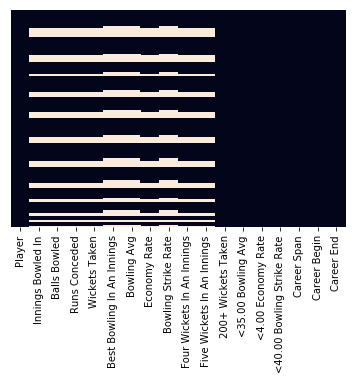

In [25]:
sns.heatmap(bowler.isnull(), yticklabels = False, cbar = False)

In [26]:
bowler = bowler.dropna(how='any')

bowler['Career End'] = bowler['Career End'].astype('int')
bowler = bowler[bowler['Career End']<2018]

bowler['Innings Bowled In'] = bowler['Innings Bowled In'].astype('int')
bowler = bowler[bowler['Innings Bowled In'] > 50]

In [27]:
bowler_new = bowler[features_bowler]

In [28]:
bowler_new.head()

,Player,Innings Bowled In,Balls Bowled,Wickets Taken,Bowling Avg,Economy Rate,Bowling Strike Rate,Four Wickets In An Innings
0,JM Anderson,191,9584,269,29.22,4.92,35.6,11
1,D Gough,155,8422,234,26.29,4.38,35.9,10
2,SCJ Broad,121,6109,178,30.13,5.26,34.3,9
3,A Flintoff,116,5496,168,23.61,4.33,32.7,6
4,IT Botham,115,6271,145,28.54,3.96,43.2,3


In [29]:
bowler_new['Four Wickets In An Innings']  = bowler_new['Four Wickets In An Innings'].astype('int')
bowler_new['Innings Bowled In']           = bowler_new['Innings Bowled In'].astype('int')
bowler_new['Wickets Taken']               = bowler_new['Wickets Taken'].astype('int')
bowler_new['Balls Bowled']                = bowler_new['Balls Bowled'].astype('int')
bowler_new['Bowling Avg']                 = bowler_new['Bowling Avg'].astype('float')
bowler_new['Economy Rate']                = bowler_new['Economy Rate'].astype('float')
bowler_new['Bowling Strike Rate']         = bowler_new['Bowling Strike Rate'].astype('float')


C:\Users\Shantanu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Shantanu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Shantanu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:

In [30]:
bowler_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 0 to 1862
Data columns (total 8 columns):
Player                        230 non-null object
Innings Bowled In             230 non-null int32
Balls Bowled                  230 non-null int32
Wickets Taken                 230 non-null int32
Bowling Avg                   230 non-null float64
Economy Rate                  230 non-null float64
Bowling Strike Rate           230 non-null float64
Four Wickets In An Innings    230 non-null int32
dtypes: float64(3), int32(4), object(1)
memory usage: 12.6+ KB


#### AllRounder Dataset

In [31]:
allrounder['Player']     = allrounder['Player'].str.split('(')
allrounder['Career End'] = allrounder['Player'].str.get(1)
allrounder['Career End'] = allrounder['Career End'].str.split('-')
allrounder['Career End'] = allrounder['Career End'].str.get(1)
allrounder['Career End'] = allrounder['Career End'].str[:-1]
allrounder['Player']     = allrounder['Player'].str.get(0)
allrounder['Career End'] = allrounder['Career End'].astype(int)

In [32]:
allrounder[allrounder['Career End'] < 2018]
allrounder = allrounder[features_allrounder]
allrounder.head()

,Player,Batting-Bowling Avg Diff
0,A Flintoff,8.35
1,PD Collingwood,-3.32
2,IT Botham,-5.32
3,SR Watson,8.74
4,A Symonds,2.49


In [33]:
allrounder=allrounder.sort_values(by='Batting-Bowling Avg Diff',ascending=False)

In [34]:
allrounder = allrounder.head(10)

#### Fielding Dataset

In [35]:
fielder['Player']     = fielder['Player'].str.split('(')
fielder['Career End'] = fielder['Player'].str.get(1)
fielder['Career End'] = fielder['Career End'].str.split('-')
fielder['Career End'] = fielder['Career End'].str.get(1)
fielder['Career End'] = fielder['Career End'].str[:-1]
fielder['Player']     = fielder['Player'].str.get(0)

In [36]:
# Cleaning null values
fielder = fielder.dropna(how = 'any')
fielder['Career End'] = fielder['Career End'].astype('int')
fielder = fielder[fielder['Career End'] < 2018]

fielder_new = fielder[fielder['Catches As A Keeper'] < 30]
fielder_new = fielder_new[features_fielder]

fielder_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1717 entries, 2 to 1952
Data columns (total 7 columns):
Player                          1717 non-null object
Innings Fielded                 1717 non-null int64
Fielding Dismissals Made        1717 non-null int64
Catches Taken                   1717 non-null int64
Catches As A Fielder            1717 non-null int64
Max Dismissals In An Innings    1717 non-null object
Dismissals Per Innings          1717 non-null float64
dtypes: float64(1), int64(4), object(2)
memory usage: 107.3+ KB


In [37]:
fielder_new['Max Dismissals In An Innings'] = fielder_new['Max Dismissals In An Innings'].str.split(' ')
fielder_new['Max Dismissals In An Innings'] = fielder_new['Max Dismissals In An Innings'].str.get(0)
fielder_new['Max Dismissals In An Innings'] = fielder_new['Max Dismissals In An Innings'].astype('float')

In [38]:
fielder_new.head()

,Player,Innings Fielded,Fielding Dismissals Made,Catches Taken,Catches As A Fielder,Max Dismissals In An Innings,Dismissals Per Innings
2,PD Collingwood,197,108,108,108,3.0,0.548
7,GA Hick,119,64,64,64,3.0,0.537
8,AJ Strauss,127,57,57,57,3.0,0.448
9,IR Bell,160,54,54,54,3.0,0.337
10,JM Anderson,192,53,53,53,3.0,0.276


#### Keeping dataset

In [39]:
keeper = fielder
keeper = keeper[features_keeper]
keeper = keeper[keeper['Catches As A Keeper'] >= 30]
keeper.head()

,Player,Stumpings Made,Catches As A Keeper
0,AJ Stewart,15,148
3,MJ Prior,8,69
4,GO Jones,4,68
6,C Kieswetter,12,52
13,RC Russell,6,41


In [40]:
keeper.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 0 to 1734
Data columns (total 3 columns):
Player                 44 non-null object
Stumpings Made         44 non-null int64
Catches As A Keeper    44 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.4+ KB


### <u>Scaling

* It is done so that each column can come under same scale

#### Batting Dataset

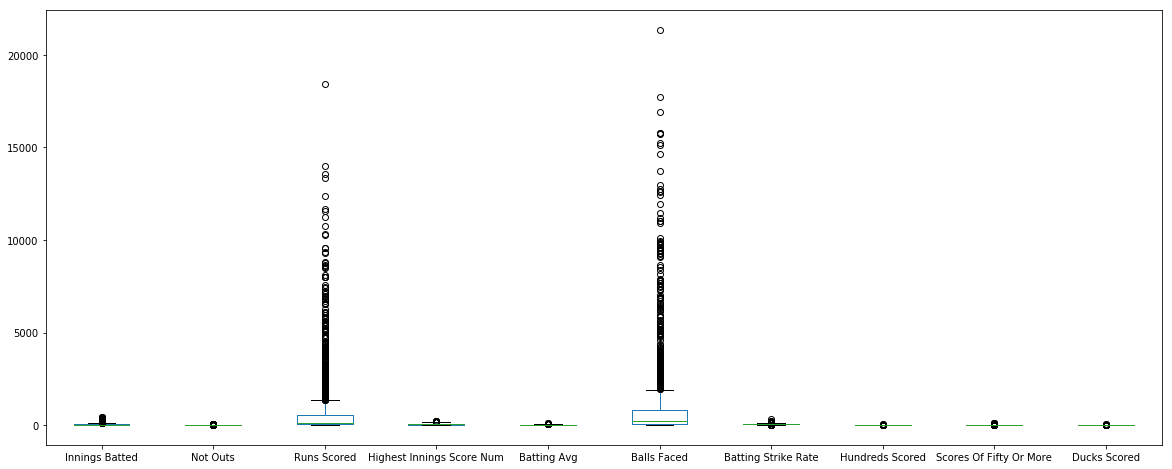

In [41]:
batting_new.plot(kind='box',figsize=(20,8))

In [42]:
sc1 = MinMaxScaler()

batting_new[['Innings Batted', 'Not Outs', 'Runs Scored', 'Highest Innings Score Num',
             'Batting Avg', 'Balls Faced', 'Batting Strike Rate',
             'Hundreds Scored', 'Scores Of Fifty Or More','Ducks Scored']]=sc1.fit_transform(
             batting_new[['Innings Batted', 'Not Outs', 'Runs Scored','Highest Innings Score Num',
                          'Batting Avg', 'Balls Faced','Batting Strike Rate', 'Hundreds Scored',
                          'Scores Of Fifty Or More','Ducks Scored']])

batting_new.head()

,Player,Innings Batted,Not Outs,Runs Scored,Highest Innings Score Num,Batting Avg,Balls Faced,Batting Strike Rate,Hundreds Scored,Scores Of Fifty Or More,Ducks Scored
0,IR Bell,0.345898,0.194444,0.293932,0.643836,0.450833,0.328466,0.234836,0.081633,0.364583,0.176471
2,PD Collingwood,0.399113,0.513889,0.276349,0.547945,0.420952,0.309510,0.234288,0.102041,0.270833,0.205882
3,AJ Stewart,0.356984,0.194444,0.253826,0.529680,0.376190,0.320135,0.208053,0.081633,0.291667,0.382353
5,KP Pietersen,0.270510,0.222222,0.239987,0.593607,0.491905,0.238650,0.263871,0.183673,0.260417,0.205882
6,ME Trescothick,0.268293,0.083333,0.235265,0.625571,0.444881,0.238042,0.259336,0.244898,0.218750,0.382353


#### Bowling Dataset

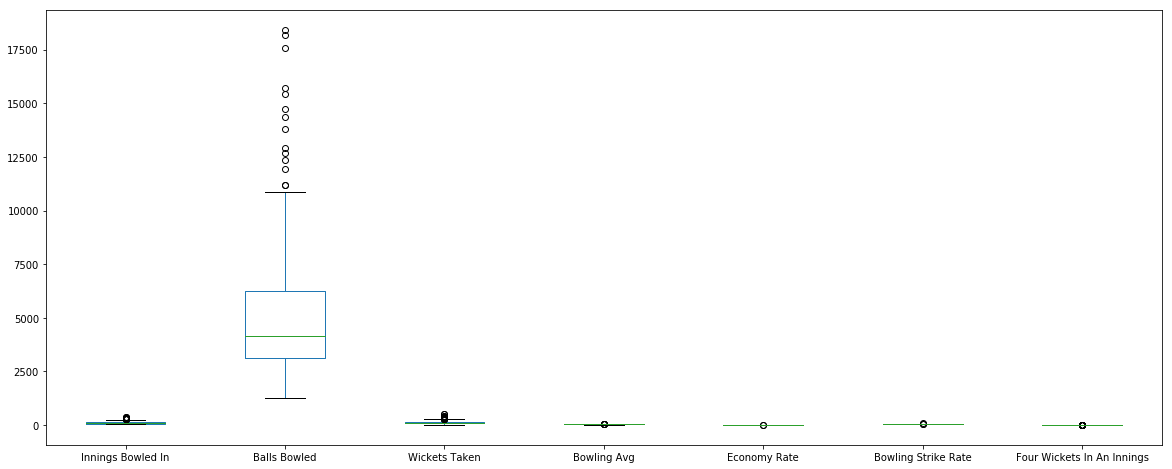

In [43]:
bowler_new.plot(kind = 'box',figsize=(20,8))

In [44]:
sc2 = MinMaxScaler()

bowler_new[['Innings Bowled In','Balls Bowled','Wickets Taken','Bowling Avg','Economy Rate',
      'Bowling Strike Rate', 'Four Wickets In An Innings']] = sc2.fit_transform(bowler_new[[
      'Innings Bowled In','Balls Bowled','Wickets Taken','Bowling Avg','Economy Rate',
      'Bowling Strike Rate', 'Four Wickets In An Innings']])

bowler_new.head()

C:\Users\Shantanu\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Shantanu\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Player,Innings Bowled In,Balls Bowled,Wickets Taken,Bowling Avg,Economy Rate,Bowling Strike Rate,Four Wickets In An Innings
0,JM Anderson,0.440252,0.485102,0.495030,0.289459,0.614094,0.184855,0.647059
1,D Gough,0.327044,0.417481,0.425447,0.207752,0.432886,0.191537,0.588235
2,SCJ Broad,0.220126,0.282879,0.314115,0.314835,0.728188,0.155902,0.529412
3,A Flintoff,0.204403,0.247207,0.294235,0.133017,0.416107,0.120267,0.352941
4,IT Botham,0.201258,0.292307,0.248509,0.270496,0.291946,0.354120,0.176471


#### Fielding Dataset

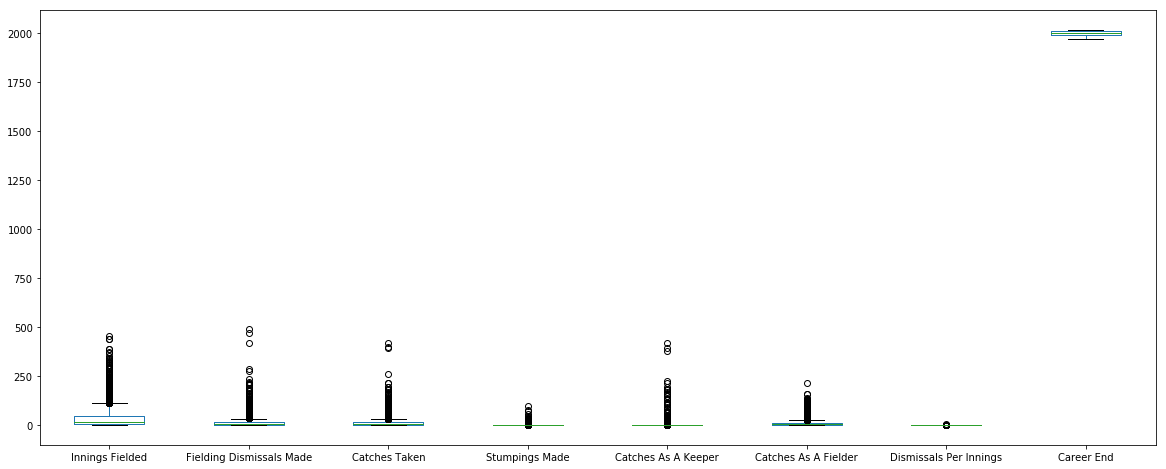

In [45]:
fielder.plot(kind='box',figsize=(20,8))

In [46]:
sc3 = MinMaxScaler()

fielder_new[['Innings Fielded','Fielding Dismissals Made','Catches Taken','Catches As A Fielder',
         'Max Dismissals In An Innings','Dismissals Per Innings']] = sc3.fit_transform(fielder_new[[
         'Innings Fielded','Fielding Dismissals Made','Catches Taken','Catches As A Fielder',
         'Max Dismissals In An Innings','Dismissals Per Innings']])

fielder_new.head()

,Player,Innings Fielded,Fielding Dismissals Made,Catches Taken,Catches As A Fielder,Max Dismissals In An Innings,Dismissals Per Innings
2,PD Collingwood,0.430769,0.509434,0.509434,0.509434,0.6,0.182667
7,GA Hick,0.259341,0.301887,0.301887,0.301887,0.6,0.179000
8,AJ Strauss,0.276923,0.268868,0.268868,0.268868,0.6,0.149333
9,IR Bell,0.349451,0.254717,0.254717,0.254717,0.6,0.112333
10,JM Anderson,0.419780,0.250000,0.250000,0.250000,0.6,0.092000


#### Keeping Dataset

In [47]:
sc4 = MinMaxScaler()

keeper[['Stumpings Made','Catches As A Keeper']] = sc4.fit_transform(keeper[['Stumpings Made',
                                                                            'Catches As A Keeper']])

keeper.head()

,Player,Stumpings Made,Catches As A Keeper
0,AJ Stewart,0.147368,0.305699
3,MJ Prior,0.073684,0.101036
4,GO Jones,0.031579,0.098446
6,C Kieswetter,0.115789,0.056995
13,RC Russell,0.052632,0.028497


### <u>Defining weights for the calculation of the evaluation score

In [48]:
a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a_4  = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, -4

### <u>Calculating evaluation score -

#### Batting Dataset

In [49]:
batting_new['eval'] = ( batting_new['Innings Batted']*a2 +
                        batting_new['Not Outs']*a6 +
                        batting_new['Runs Scored']*a7 +
                        batting_new['Highest Innings Score Num']*a10 +
                        batting_new['Batting Avg']*a8 + 
                        batting_new['Batting Strike Rate']*a2 +
                        batting_new['Balls Faced']*a8 +
                        batting_new['Hundreds Scored']*a6 +
                        batting_new['Scores Of Fifty Or More']*a9 +
                        batting_new['Ducks Scored']*a_4 )/(2*a2 + 2*a6 + a7 + a10 + 2*a8 + a9 + a_4)

#### Bowling Dataset

In [50]:
bowler_new['eval'] = ( bowler_new['Innings Bowled In']*a3 + 
                       bowler_new['Balls Bowled']*a5 + 
                       bowler_new['Wickets Taken']*a6 + 
                       (1 - bowler_new['Bowling Avg'])*a10 + 
                       (1 - bowler_new['Economy Rate'])*a8 + 
                       (1 - bowler_new['Bowling Strike Rate'])*a9 + 
                       bowler_new['Four Wickets In An Innings']*a7 )/(a3+a5+a6+a7+a8+a9+a10)


C:\Users\Shantanu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


#### Fielding Dataset

In [51]:
fielder_new['eval'] = ( fielder_new['Max Dismissals In An Innings']*a10 +
                        fielder_new['Innings Fielded']*a2 +
                        fielder_new['Catches As A Fielder']*a7 +
                        fielder_new['Dismissals Per Innings']*a4 +
                        fielder_new['Fielding Dismissals Made']*a5 +
                        fielder_new['Catches Taken']*a2 )/( 2*a2 + a10 + a7 + a4 + a5 )

#### Keeping Dataset

In [52]:
keeper['eval'] = ( keeper['Stumpings Made']*a5 + keeper['Catches As A Keeper']*a2 )/(a5 + a2)

## ==================== Visualizing Best Cricketers ====================

#### Batting Dataset

In [53]:
eval_score1 = batting_new[['Player','eval']].sort_values(by = 'eval', ascending = False).head(10)
eval_score1

,Player,eval
977,SR Tendulkar,0.870195
1413,KC Sangakkara,0.719480
248,RT Ponting,0.689079
473,JH Kallis,0.653996
978,SC Ganguly,0.617933
1197,Inzamam-ul-Haq,0.617522
979,R Dravid,0.614215
1414,ST Jayasuriya,0.593389
1415,DPMD Jayawardene,0.587557
599,BC Lara,0.579846


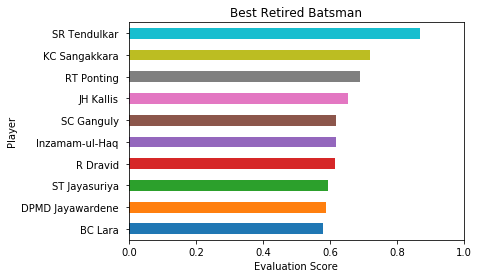

In [54]:
eval_score1 = eval_score1.sort_values(by = 'eval')
eval_score1.plot(x = "Player", y = "eval", kind = "barh", xlim = (0,1), legend = False)
_=plt.title("Best Retired Batsman")
_=plt.xlabel("Evaluation Score")
_=plt.ylabel("Player")

## Best Batsman

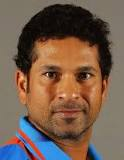

In [55]:
Image(filename='Sachin.jpg', embed=True,width=150)

#### Bowling Dataset

In [56]:
eval_score2 = bowler_new[['Player','eval']].sort_values(by = 'eval', ascending = False).head(10)
eval_score2

,Player,eval
1197,Wasim Akram,0.880655
1413,M Muralitharan,0.871979
473,SM Pollock,0.774473
1198,Waqar Younis,0.759762
249,GD McGrath,0.748648
248,B Lee,0.736494
1414,WPUJC Vaas,0.712779
1200,Saqlain Mushtaq,0.694326
474,AA Donald,0.692135
250,SK Warne,0.673367


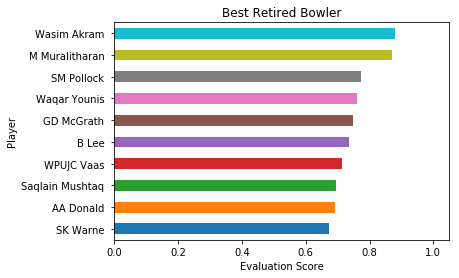

In [57]:
eval_score2 = eval_score2.sort_values(by='eval')
eval_score2.plot(x="Player",y="eval",kind="barh",xlim=(0,1.05),legend=False)
_=plt.title("Best Retired Bowler")
_=plt.xlabel("Evaluation Score")
_=plt.ylabel("Player")

## Best Bowler

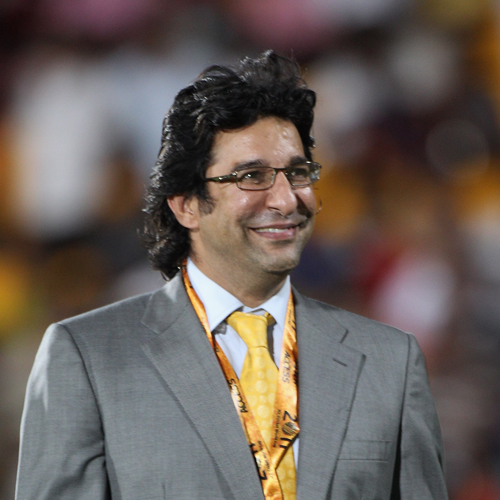

In [58]:
Image(filename='Akram.jpg', embed=True,width=200)

#### AllRounder Dataset

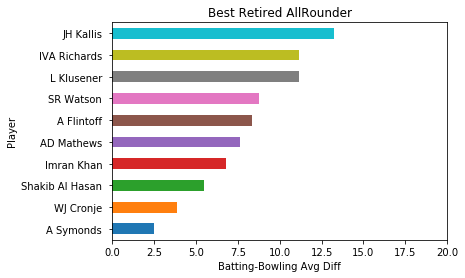

In [59]:
allrounder=allrounder.sort_values(by='Batting-Bowling Avg Diff')
allrounder.plot(x="Player",y="Batting-Bowling Avg Diff",kind="barh",xlim = (0,20),legend=False)
_=plt.title("Best Retired AllRounder")
_=plt.xlabel("Batting-Bowling Avg Diff")
_=plt.ylabel("Player")

## Best AllRounder

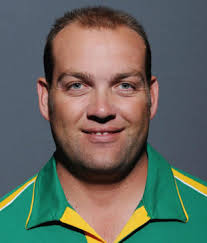

In [60]:
Image(filename='Kallis.jpg', embed=True,width=150)

#### Fielding Dataset 

In [61]:
eval_score3 = fielder_new[['Player','eval']].sort_values(by = 'eval', ascending = False).head(10)
eval_score3

,Player,eval
1414,DPMD Jayawardene,0.752207
979,M Azharuddin,0.679406
981,SR Tendulkar,0.655154
251,RT Ponting,0.623235
1200,Younis Khan,0.619349
479,JN Rhodes,0.619021
785,SP Fleming,0.618713
602,CL Hooper,0.587327
257,MJ Clarke,0.554836
476,JH Kallis,0.553180


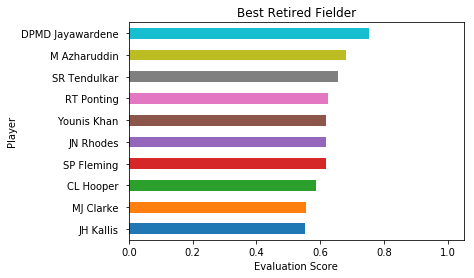

In [62]:
eval_score3 = eval_score3.sort_values(by = 'eval')
eval_score3.plot(x = "Player", y = "eval", kind = "barh", xlim = (0,1.05), legend = False)
_=plt.title("Best Retired Fielder")
_=plt.xlabel("Evaluation Score")
_=plt.ylabel("Player")

## Best Fielder

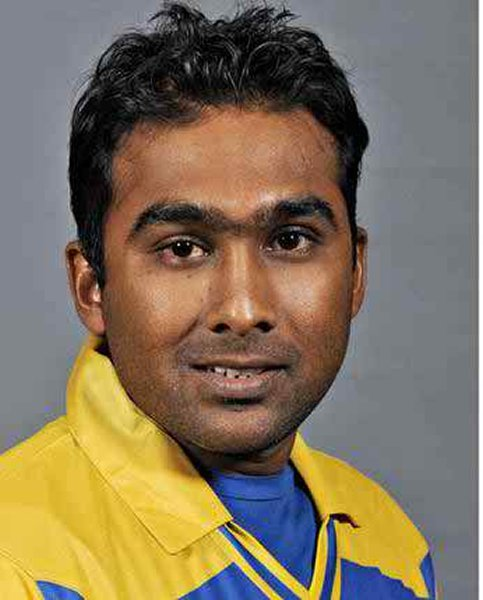

In [63]:
Image(filename='Jayawardene.jpg', embed=True,width=150)

#### Keeping Dataset

In [64]:
eval_score4 = keeper[['Player','eval']].sort_values(by = 'eval', ascending = False).head(10)
eval_score4

,Player,eval
1413,KC Sangakkara,0.971132
248,AC Gilchrist,0.684211
1197,Moin Khan,0.677549
1415,RS Kaluwitharana,0.631150
473,MV Boucher,0.419806
249,IA Healy,0.407106
1198,Rashid Latif,0.390705
980,NR Mongia,0.382524
1199,Kamran Akmal,0.318828
1599,A Flower,0.309323


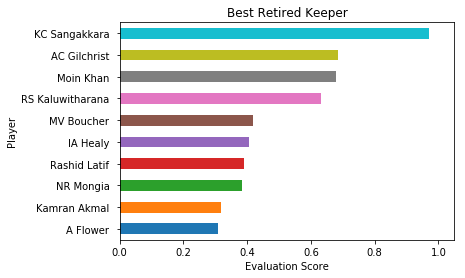

In [65]:
eval_score4 = eval_score4.sort_values(by = 'eval')
eval_score4.plot(x = "Player", y = "eval", kind = "barh", xlim = (0,1.05),legend = False)
_=plt.title("Best Retired Keeper")
_=plt.xlabel("Evaluation Score")
_=plt.ylabel("Player")

## Best Keeper

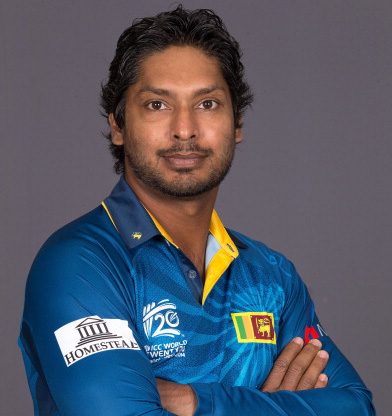

In [66]:
Image(filename='Sangakara.jpg', embed=True,width=150)

# ================== World's Former Best XI ====================

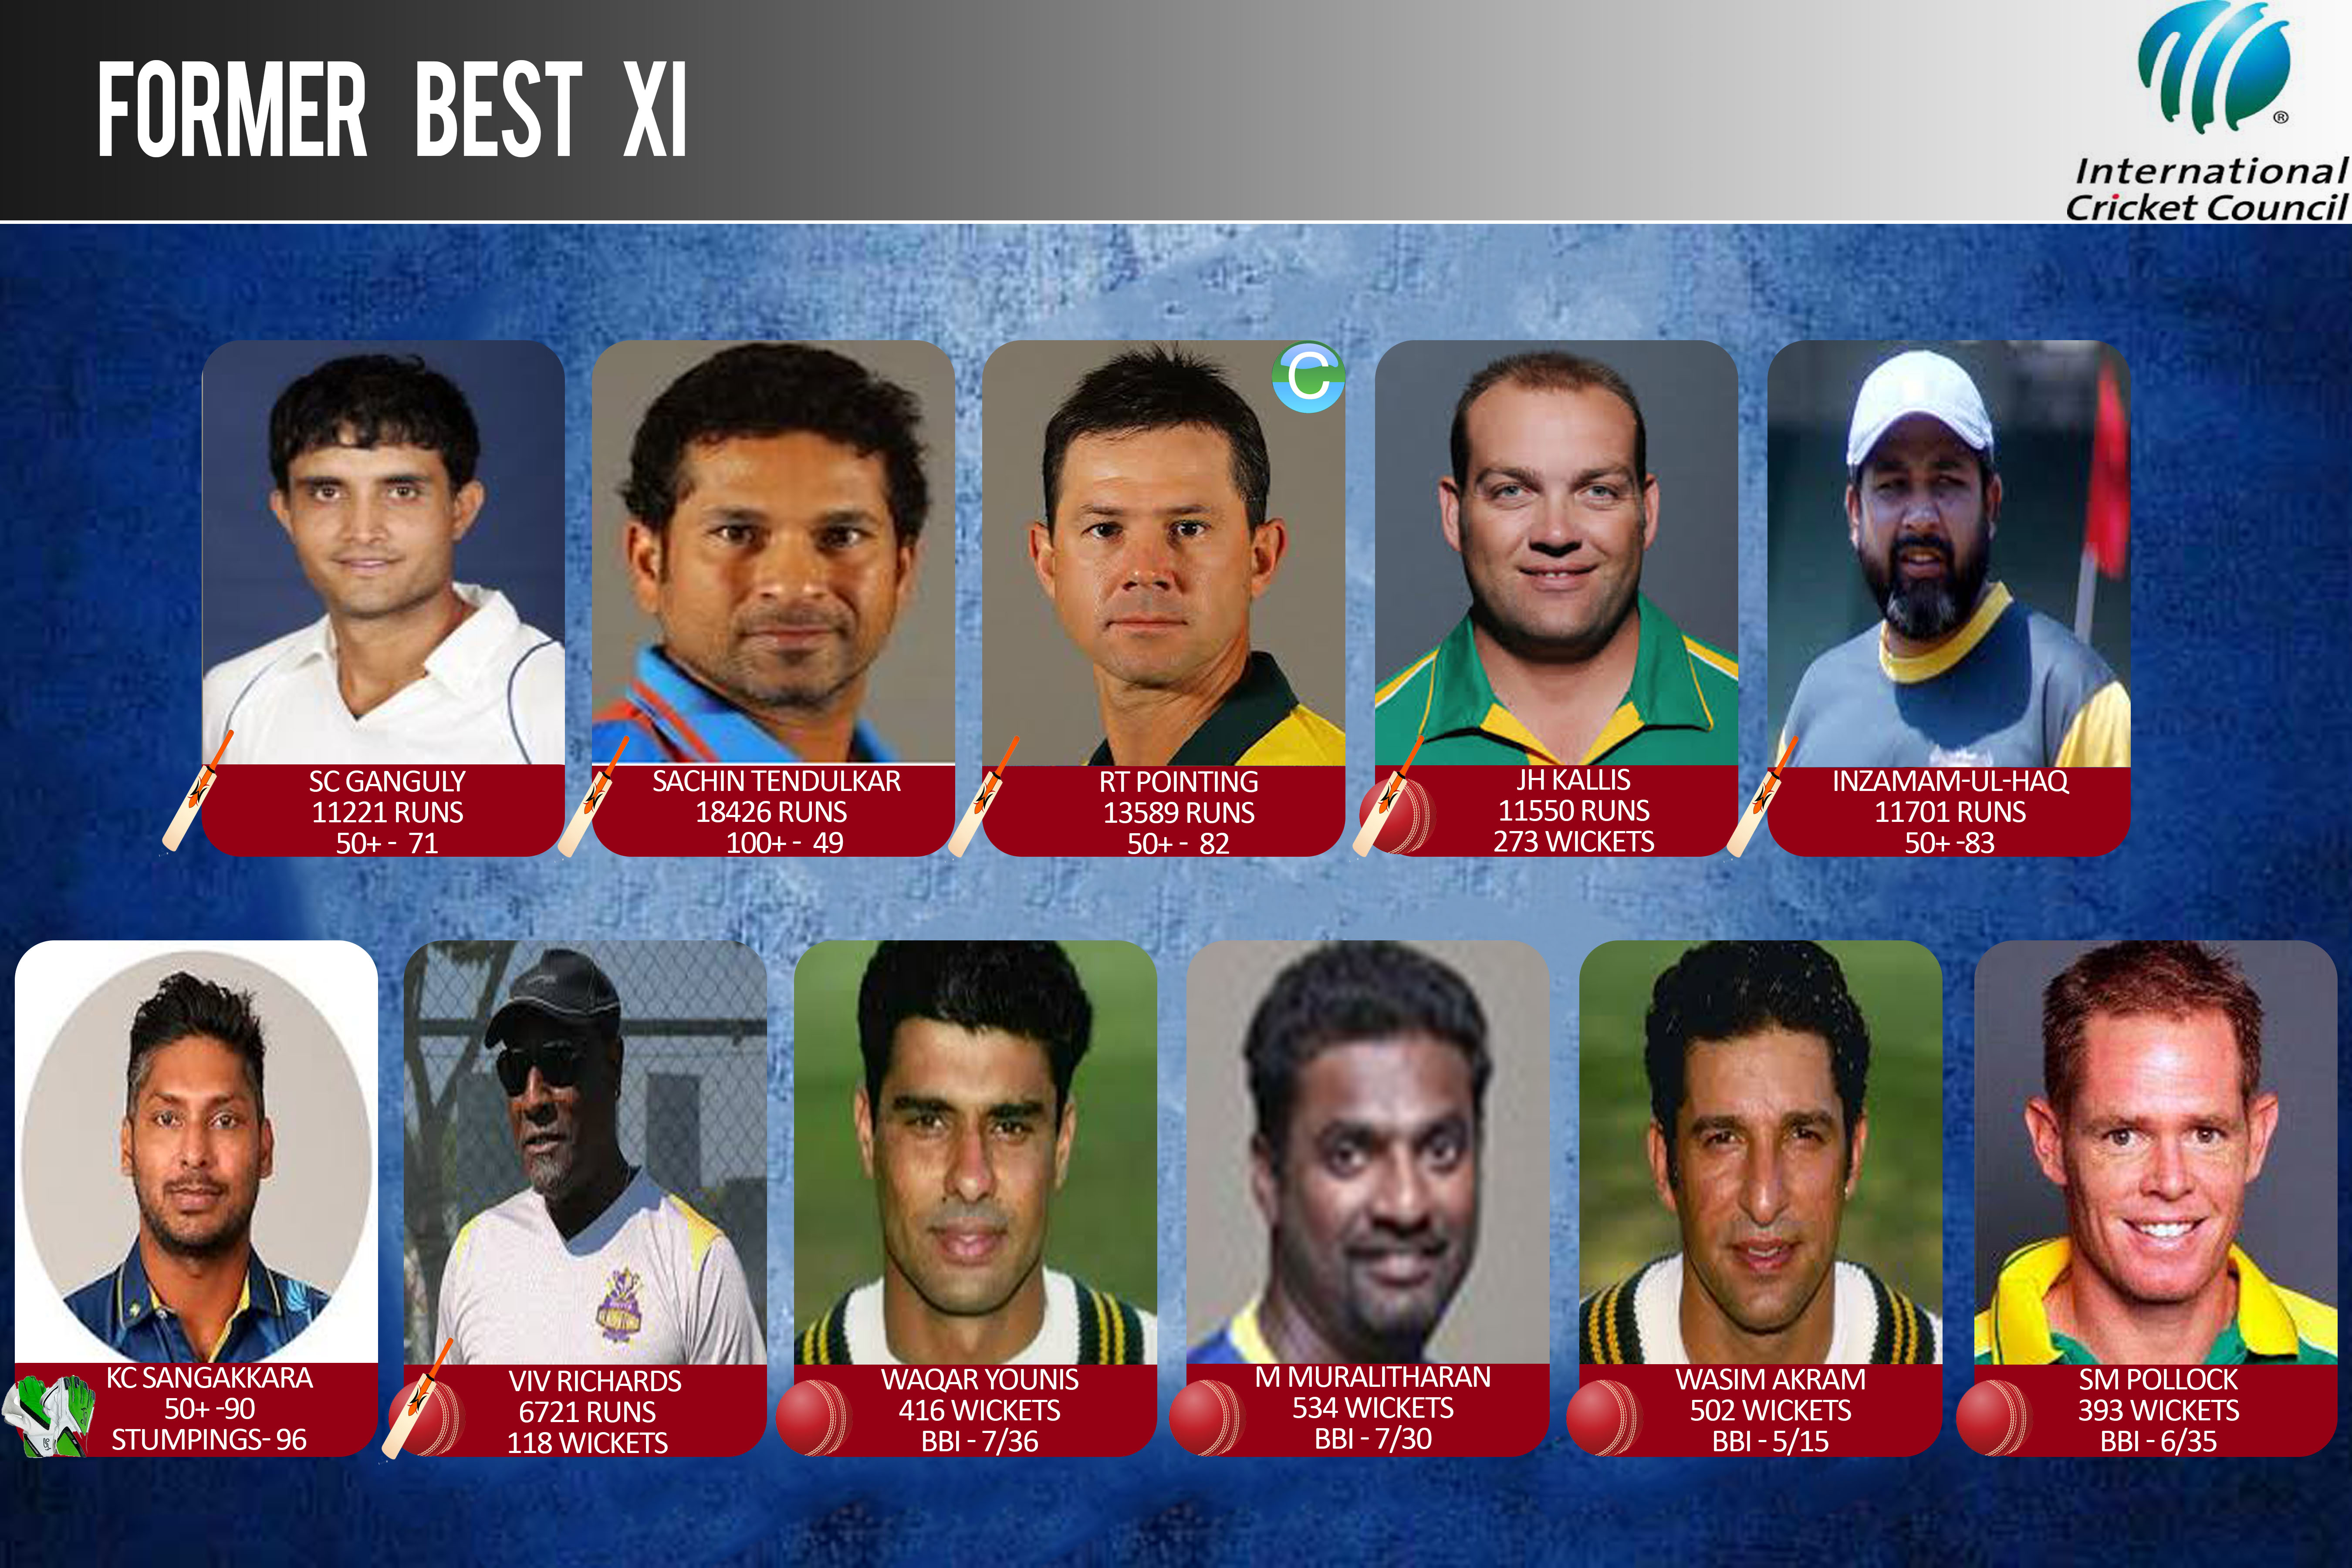

In [67]:
Image(filename = 'Formal Best XI.jpg')